# Model testing

## 1. RNN Seq2Seq

In [1]:
from data_module.mt_fra_eng import MTFraEng
from module.rnn_no_attn.encoder import Encoder
from module.rnn_no_attn.decoder import Decoder
from module.base.seq_2_seq import Seq2Seq
from utils.trainer import Trainer

In [10]:
BATCH_SIZE = 256
EMBEDDING_DIM = 64
NUM_HIDDENS = 256
NUM_LAYERS = 2
DROPOUT = 0.2
LEARNING_RATE = 0.005
MAX_EPOCHS = 30

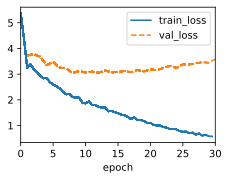

In [11]:
data = MTFraEng(batch_size=BATCH_SIZE)
encoder = Encoder(len(data.src_vocab), EMBEDDING_DIM,
                  NUM_HIDDENS, NUM_LAYERS, DROPOUT)
decoder = Decoder(len(data.tgt_vocab), EMBEDDING_DIM,
                  NUM_HIDDENS, NUM_LAYERS, DROPOUT)
model = Seq2Seq(encoder, decoder, tgt_pad=data.tgt_vocab['<pad>'],
                learning_rate=LEARNING_RATE)
# trainer = Trainer(max_epochs=MAX_EPOCHS, gradient_clip_val=1)
# trainer.fit(model, data)

In [15]:
import torch
# torch.save(model.state_dict(), "rnn_no_attn.model")

In [ ]:
model.load_state_dict(torch.load("model_dir/rnn_no_attn.model"))